In [1]:
%matplotlib inline
import math
import numpy as np

from tdfs.routines import tdfs_routine, tdfs_log_upper_bound
from rho_rand.routines import rho_rand_routine
from mega.routines import mega_routine
from musical_chairs.routines import mc_routine
from plots import regret_plt

In [2]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 1000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.9]
best_arms_mean = np.sort(arm_means)
best_arms_mean = best_arms_mean[::-1]
best_arms_mean = best_arms_mean[:n_users]
# MONTE-CARLO PARAMETERS
mc_horizon = 50

# Single example TDFS
This next run is designed just to show the results we obtain with TDFS

In [3]:
total_rewards_tdfs = tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')

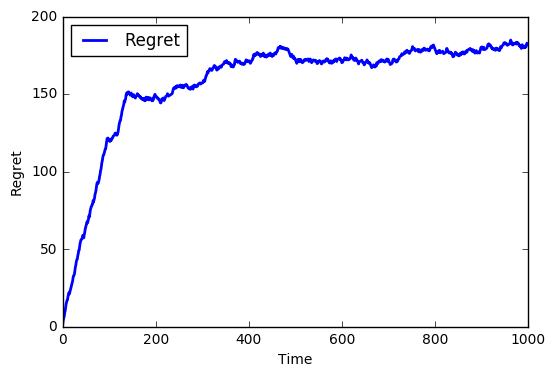

In [4]:
regret_plt(best_arms_mean, total_rewards_tdfs)

# TDFS expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy. It also shows the upper bound calculated thanks to the theorem 2.

In [5]:
tdfs_rewards = np.zeros((mc_horizon, t_horizon))

In [6]:
for t in range(mc_horizon):
    tdfs_rewards[t, :] = tdfs_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

In [7]:
c = tdfs_log_upper_bound(n_users, arm_means)
upper_bound = [c * math.log(t) for t in range(1, t_horizon)]
upper_bound = [0] + upper_bound

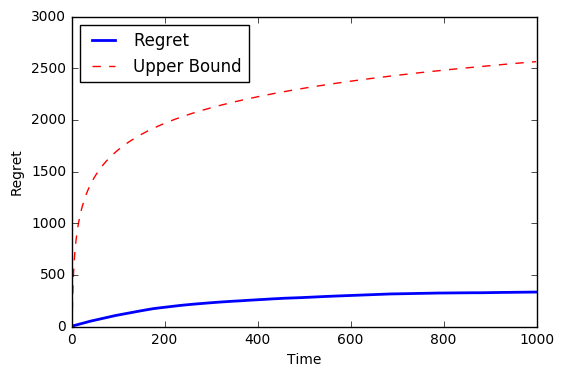

In [8]:
tdfs_expected_rewards = np.mean(tdfs_rewards, axis=0)
regret_plt(best_arms_mean, tdfs_expected_rewards, upper_bound=upper_bound)

# Single example Rho Rand
This next run is designed just to show the results we obtain with rho rand

In [9]:
total_rewards_rho_rand = rho_rand_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')

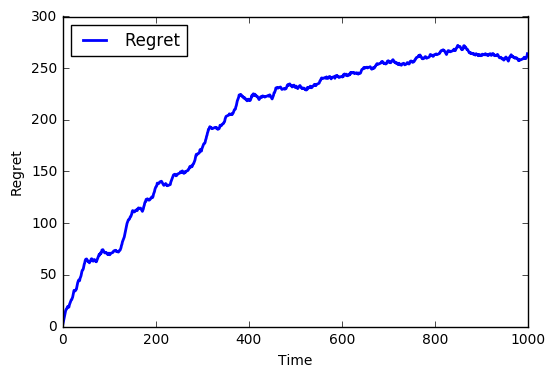

In [10]:
regret_plt(best_arms_mean, total_rewards_rho_rand)

# Rho Rand expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy.

In [11]:
rho_rand_rewards = np.zeros((mc_horizon, t_horizon))

In [12]:
for t in range(mc_horizon):
    rho_rand_rewards[t, :] = rho_rand_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

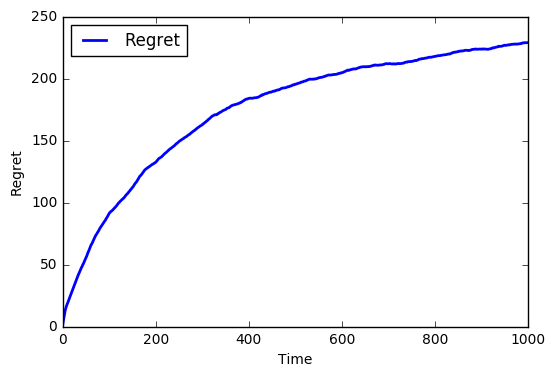

In [13]:
rho_rand_expected_rewards = np.mean(rho_rand_rewards, axis=0)
regret_plt(best_arms_mean, rho_rand_expected_rewards)

# Single example MEGA
This next run is designed just to show the results we obtain with Mega

In [14]:
# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

In [15]:
mega_rewards, collisions = mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='eps')
total_rewards_mega = np.sum(mega_rewards, axis=0)

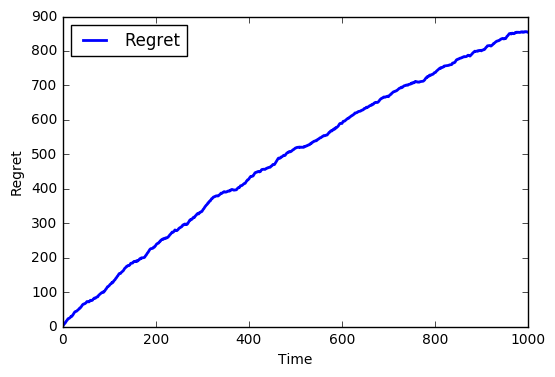

In [16]:
regret_plt(best_arms_mean, total_rewards_mega)

# MEGA expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy.

In [17]:
mega_rewards = np.zeros((mc_horizon, t_horizon))

In [18]:
for t in range(mc_horizon):
    rewards, collisions = mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='eps')
    mega_rewards[t, :] = np.sum(rewards, axis=0)

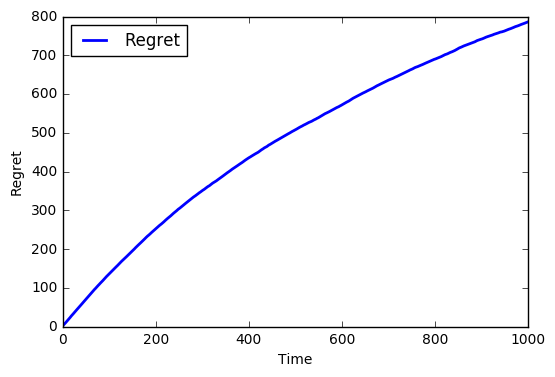

In [19]:
mega_expected_rewards = np.mean(mega_rewards, axis=0)
regret_plt(best_arms_mean, mega_expected_rewards)

# Single example Musical chairs
The next run is here to show off the results we got with musical chairs

In [4]:
# t0 - exploring phase / t1 - exploiting phase
params = {"t0": 100, "t1":200}
musical_c_rewards = mc_routine(n_users, params, n_arms, t_horizon, arm_means)

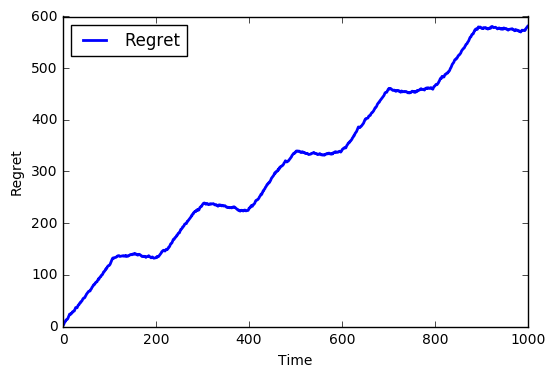

In [10]:
regret_plt(best_arms_mean, musical_c_rewards)

# Musical Chairs expected rewards
This next section is designed to show the expected regret curve using a Monte-Carlo strategy

In [12]:
musical_c_rewards = np.zeros((mc_horizon, t_horizon))

In [15]:
for t in range(mc_horizon):
    musical_c_rewards[t, :] = mc_routine(n_users, params, n_arms, t_horizon, arm_means)[:, 0]

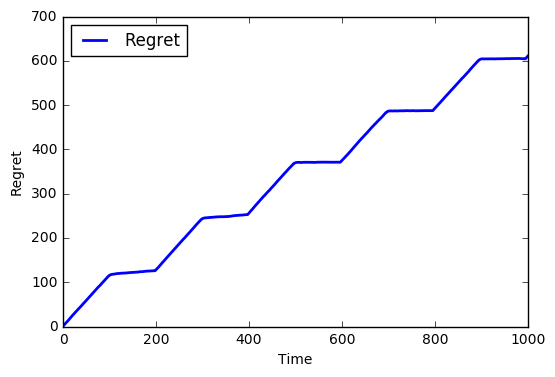

In [16]:
musical_c_expected_rewards = np.mean(musical_c_rewards, axis=0)
regret_plt(best_arms_mean, musical_c_expected_rewards)